In [1]:
!pip install pandas 
!pip install numpy 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 non-null  object

In [7]:
# Dataset Structure and Dimensions,Preview the Dataset
df.columns    
df.shape    
df.head()  
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
235687,1C4RJXN62R,Pierce,Tacoma,WA,98407.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,27.0,267004272,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
235688,5YJSA1E28J,Snohomish,Stanwood,WA,98292.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.0,0.0,10.0,198794410,POINT (-122.37265 48.24159),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.306105e+10
235689,3FA6P0SU2F,King,Redmond,WA,98052.0,2015,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,48.0,261742288,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
235690,WA1BCBFZ6P,Snohomish,Lake Stevens,WA,98258.0,2023,AUDI,Q4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,253474854,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
235691,WBY33AW03P,King,Issaquah,WA,98027.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,5.0,229583490,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [12]:
 # Task 3.Data Cleaning
# How many missing values exist in the dataset, and in which columns?
total_missing_values = df.isna().sum().sum()  
missing_values_in_each_column = df.isna().sum()  
missing_values_in_each_column [missing_values_in_each_column>0] 

County                    3
City                      3
Postal Code               3
Electric Range           36
Base MSRP                36
Legislative District    494
Vehicle Location         10
Electric Utility          3
2020 Census Tract         3
dtype: int64

In [13]:
# How should missing or zero values in the Base MSRP and Electric Range columns be handled.
print("initial nan count:",df['Base MSRP'].isnull().sum())  
zero_count = (df["Base MSRP"]==0).sum()  
print("initial zer count:",zero_count )  
print("median before converting zer to nan :",df['Base MSRP'].median())  
df.loc[df['Base MSRP'] == 0, 'Base MSRP'] = np.nan  
zero_count = (df["Base MSRP"]==0).sum()  
print("after conversion zero count:",zero_count )  

initial nan count: 36
initial zer count: 232403
median before converting zer to nan : 0.0
after conversion zero count: 0


In [14]:
median_value=(df.loc[df["Base MSRP"]>0,"Base MSRP"].median())  
if not np.isnan(median_value):  
    df['Base MSRP'].fillna(median_value,inplace = True)  
else:  
    print("error:median is NAN  Value")  
print("nan values after replacing with median value:",df['Base MSRP'].isnull().sum())  
print(df['Base MSRP'].median()) 

nan values after replacing with median value: 0
59900.0


C:\Users\kriskali\AppData\Local\Temp\ipykernel_21044\3270963776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Base MSRP'].fillna(median_value,inplace = True)


In [18]:
# Electric Range -Missing Values Handling
print("median value:",df.loc[df["Electric Range"]>0,"Electric Range"].median())  
df.loc[df['Electric Range'] == 0, 'Electric Range'] = np.nan  
zero_count = (df["Electric Range"]==0).sum()  
df["Electric Range"].isna().sum()  
median_value=(df.loc[df["Electric Range"]>0,"Electric Range"].median())  
if not np.isnan(median_value):  
    df["Electric Range"].fillna(median_value,inplace = True)  
else:  
    print("error:median is NAN  Value")  
print("after handling zero values meadin value is:",median_value)

median value: 72.0
after handling zero values meadin value: 72.0


C:\Users\kriskali\AppData\Local\Temp\ipykernel_21044\1917118211.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Electric Range"].fillna(median_value,inplace = True)


In [20]:
# Duplicates in Dataset
duplicate_records = df[df.duplicated(subset=["VIN (1-10)"])]   
print(duplicate_records)  
EV_cleaned = df.drop_duplicates(subset=["VIN (1-10)"],keep = 'first') 

        VIN (1-10)     County          City State  Postal Code  Model Year  \
31      5YJ3E1EB5J     Yakima        Yakima    WA      98908.0        2018   
73      1N4AZ0CP5F     Kitsap     Bremerton    WA      98310.0        2015   
108     5YJ3E1EA9J   Thurston       Olympia    WA      98513.0        2018   
125     7SAYGDEE1P  Snohomish       Bothell    WA      98012.0        2023   
126     5YJ3E1EB0J       King       Seattle    WA      98102.0        2018   
...            ...        ...           ...   ...          ...         ...   
235687  1C4RJXN62R     Pierce        Tacoma    WA      98407.0        2024   
235688  5YJSA1E28J  Snohomish      Stanwood    WA      98292.0        2018   
235689  3FA6P0SU2F       King       Redmond    WA      98052.0        2015   
235690  WA1BCBFZ6P  Snohomish  Lake Stevens    WA      98258.0        2023   
235691  WBY33AW03P       King      Issaquah    WA      98027.0        2023   

          Make     Model                   Electric Vehicle Typ

In [22]:
# Task 4.Data Exploration Questions  
# 1.What are the top 5 most common EV makes and models in the dataset?  
  
top_make_model = df.groupby(["Make","Model"]).size().reset_index(name="count")   
top_5_ev_models = top_make_model.sort_values(by="count",ascending = False).head(5)  
top_5_ev_models

,Make,Model,count
147,TESLA,MODEL Y,49253
144,TESLA,MODEL 3,36065
125,NISSAN,LEAF,13814
145,TESLA,MODEL S,7885
43,CHEVROLET,BOLT EV,7278


In [23]:
#2.What is the distribution of EVs by county? Which county has the most registrations  
  
ev_by_county = df.groupby("County").size().reset_index(name = "EV count")  
ev_by_county["EV count"].max()  

118711

In [24]:
# 3.What is the average electric range of EVs in the dataset?  
print("median value:",df.loc[df["Electric Range"]>0,"Electric Range"].median())  
df.loc[df['Electric Range'] == 0, 'Electric Range'] = np.nan  
zero_count = (df["Electric Range"]==0).sum()  
zero_count  
df["Electric Range"].isna().sum()  
median_value=(df.loc[df["Electric Range"]>0,"Electric Range"].median())   
if not np.isnan(median_value):  
    df["Electric Range"].fillna(median_value,inplace = True)  
else:  
    print("error:median is NAN  Value")  
print("average electric range:",df["Electric Range"].mean())  

median value: 72.0
88.96116966210138


C:\Users\kriskali\AppData\Local\Temp\ipykernel_21044\3803821074.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Electric Range"].fillna(median_value,inplace = True)


In [28]:
# 5.What percentage of EVs are eligible for Clean Alternative Fuel Vehicle (CAFV) incentives?  
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()
eligible_count = df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"]=="Clean Alternative Fuel Vehicle Eligible"].shape[0]  
total_count = df.shape[0]  
elibible_percentage = (eligible_count/total_count)*100  
elibible_percentage

31.107122855251767

In [33]:
# 6. What is the average Base MSRP for each EV model?
msrp_stats = df.groupby(["Make","Model"])["Base MSRP"].mean().reset_index()
msrp_stats


,Make,Model,Base MSRP
0,ACURA,ZDX,59900.000000
1,ALFA ROMEO,TONALE,59900.000000
2,AUDI,A3,59900.000000
3,AUDI,A7 E,59900.000000
4,AUDI,A8 E,59900.000000
...,...,...,...
166,VOLVO,V60,59900.000000
167,VOLVO,XC40,59900.000000
168,VOLVO,XC60,58958.786742
169,VOLVO,XC90,60119.455544


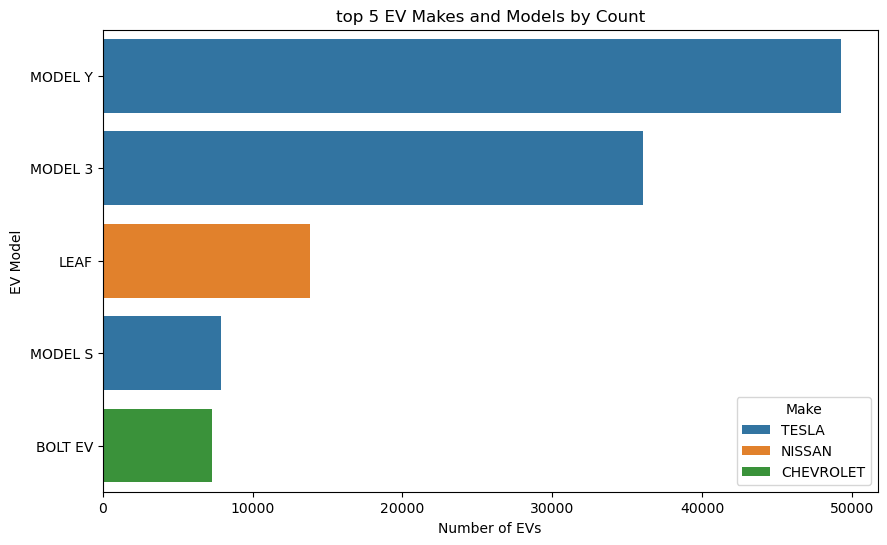

In [34]:
# 1. Create a bar chart showing the top 5 EV makes and models by count.
ev_counts=df.groupby(["Make","Model"]).size().reset_index(name="count")
top_5_ev_models = ev_counts.sort_values(by="count",ascending=False).head(5)
top_5_ev_models

plt.figure(figsize=(10, 6))
sns.barplot(y="Model",x="count", hue="Make",data = top_5_ev_models,dodge=False)
plt.xlabel("Number of EVs")
plt.ylabel("EV Model")
plt.title("top 5 EV Makes and Models by Count")
plt.show()

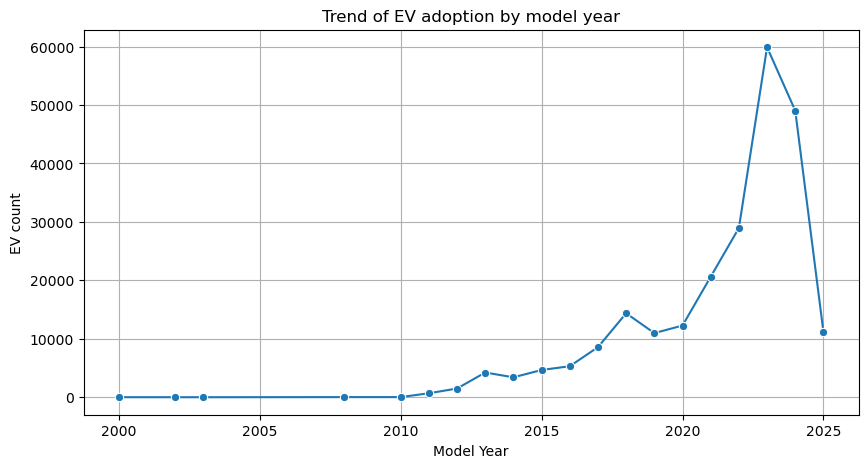

In [35]:
# Create a line graph showing the trend of EV adoption by model year.  
 
model_trend = df.groupby("Model Year").size().reset_index(name="EV count")
model_trend
plt.figure(figsize=(10,5))
sns.lineplot(x="Model Year",y="EV count",data =model_trend, marker = "o" )
plt.xlabel("Model Year")
plt.ylabel("EV count")
plt.title("Trend of EV adoption by model year")
plt.grid(True)
plt.show()

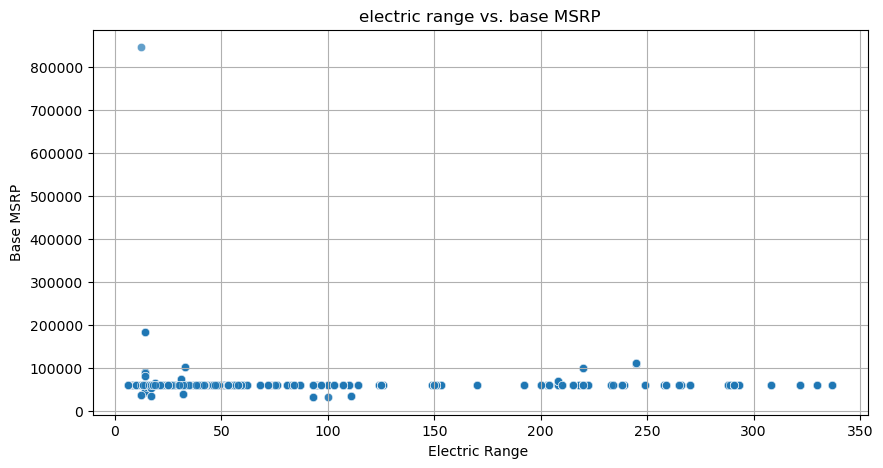

In [36]:
# 4.Generate a scatter plot comparing electric range vs. base MSRP to see pricing trends.  
df_cleaned = df[["Electric Range","Base MSRP"]]
df_cleaned
plt.figure(figsize = (10,5))
sns.scatterplot(x="Electric Range",y="Base MSRP",data = df_cleaned ,alpha = 0.7)
plt.xlabel("Electric Range ")
plt.ylabel ("Base MSRP")
plt.title("electric range vs. base MSRP")
plt.grid(True)
plt.show()

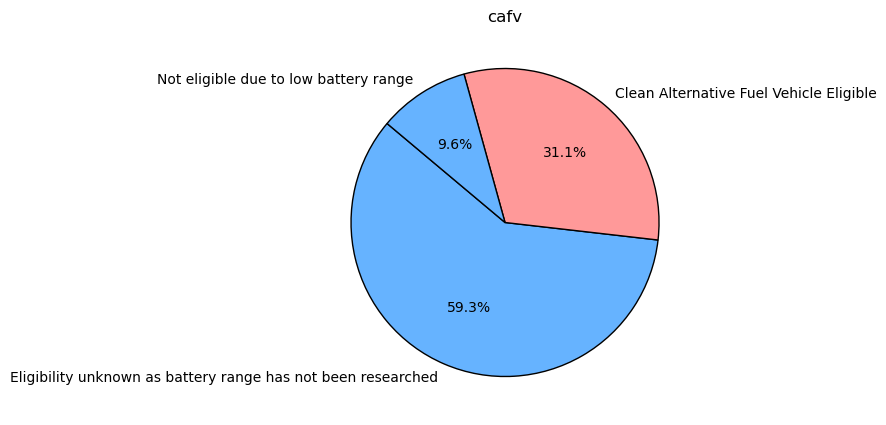

In [37]:
# Plot a pie chart showing the proportion of CAFV-eligible vs. non-eligible EVs.  
cafv_counts = df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()  
labels = cafv_counts.index  
sizes = cafv_counts.values  
plt.figure(figsize=(5,5))  
plt.pie(sizes, labels = labels,autopct="%1.1f%%",colors = ["#66b3ff","#ff9999"], startangle = 140, wedgeprops={"edgecolor":"black"})  
plt.title("cafv")  
plt.show()  